<div dir="rtl" style="text-align: center; font-family: Arial, sans-serif; line-height: 1.6;">
    <h1 style="color: #2c3e50;">آشنایی با خوشه‌بندی</h1>
</div>


<div dir="rtl" style="text-align: right; font-family: Arial, sans-serif; line-height: 1.6;">
    <h2>مقدمه</h2>
    <h3>خوشه‌بندی (Clustering) چیست؟</h3>
    <p>
        خوشه‌بندی یک روش یادگیری بدون نظارت (Unsupervised Learning) است که هدف آن گروه‌بندی داده‌های مشابه در یک مجموعه است.
        در این روش، داده‌هایی که ویژگی‌های مشترک دارند در یک خوشه قرار می‌گیرند.
    </p>
    <p>
        برای مثال:
        <ul>
            <li>در فروشگاه‌های آنلاین، خوشه‌بندی می‌تواند برای گروه‌بندی مشتریان با علایق مشابه استفاده شود.</li>
            <li>در پزشکی، خوشه‌بندی می‌تواند برای شناسایی گروه‌های مختلف بیماران با علائم مشابه مفید باشد.</li>
            <li>در فشرده‌سازی تصاویر، خوشه‌بندی می‌تواند برای کاهش تعداد رنگ‌ها با حفظ کیفیت کلی تصویر به کار رود.</li>
        </ul>
    </p>
</div>
<div dir="rtl" style="text-align: right; font-family: Arial, sans-serif; line-height: 1.6;">
    <p>
        خوشه‌بندی به ما کمک می‌کند که الگوها و ساختارهای پنهان در داده‌ها را شناسایی کنیم.
        این روش در بسیاری از زمینه‌ها از جمله بازاریابی، زیست‌پزشکی و سیستم‌های پیشنهاددهی (Recommendation Systems) کاربرد دارد.
    </p>
    <p>
        در این دفترچه یادداشت، شما با الگوریتم ساده اما قدرتمند K-میانگین (K-means) آشنا می‌شوید.
        این الگوریتم یک روش محبوب برای خوشه‌بندی داده‌هاست.
        ما به شما نشان می‌دهیم که چگونه می‌توانید با استفاده از عملیات ساده برداری (Vector Operations) و ماتریسی (Matrix Operations) این الگوریتم را پیاده‌سازی کنید.
    </p>
    <p>
        در طول این یادگیری:
        <ol>
            <li>شما قدم به قدم الگوریتم K-میانگین را پیاده‌سازی خواهید کرد.</li>
            <li>ابتدا از یک مجموعه داده دوبعدی ساده استفاده می‌کنید تا بتوانید خوشه‌بندی را به‌صورت تصویری مشاهده کنید.</li>
            <li>سپس، یک مجموعه داده واقعی‌تر را بررسی می‌کنید که در آن داده‌ها دوبعدی نیستند.</li>
        </ol>
    </p>
</div>

<div dir="rtl" style="text-align: right;">

# پیاده‌سازی

## بارگذاری مجموعه داده

### ساختار مجموعه داده
فایل `dataset1.txt` حاوی نقاطی در یک صفحه دو بعدی است. هر خط از فایل نشان‌دهنده یک نقطه است و شامل دو مقدار عددی است که با comma (,) جدا شده‌اند.
ستون اول نمایانگر x نقطه و ستون دوم نمایانگر y آن نقطه است.

داده‌ها را در قالب یک آرایه `numpy` بارگذاری کنید و سپس ابعاد آن و چند خط اول آن را خروجی دهید و بررسی کنید. هر یک از داده‌ها را یک نقطه در نظر بگیرید و نقاط را با استفاده از `matplotlib` روی یک صفحه دوبعدی نمایش دهید.

### بحث کنید
- در مورد توزیع داده‌ها چه چیزی مشاهده می‌کنید؟
- آیا می‌توانید به صورت چشمی خوشه‌های بالقوه را شناسایی کنید؟
- این خوشه‌ها ممکن است در یک سناریوی واقعی چه چیزی را نمایندگی کنند؟

</div>


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[[ 3.48729968 -0.87866231]
 [ 6.8802971  -1.93980419]
 [ 7.46604255 -2.56216001]
 [-0.94849111  7.28582509]
 [-3.01438992  9.28468619]]


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\alien\AppData\Local\Temp\ipykernel_2888\1486332043.py:2: SyntaxWarning: invalid escape sequence '\P'
  data = np.loadtxt("E:\دوره تابستانه\Practice\clustering\dataset1.txt", delimiter=",")


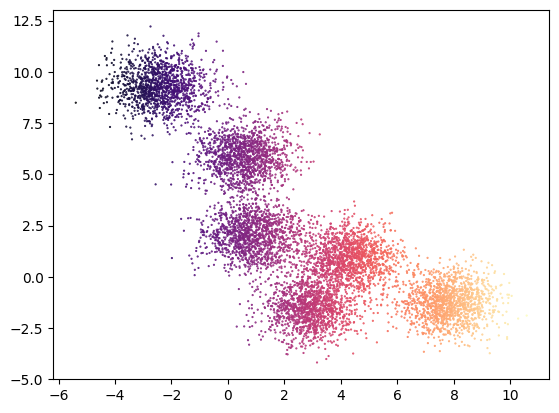

In [58]:
# TODO: Load the dataset as a numpy array
data = np.loadtxt("E:\دوره تابستانه\Practice\clustering\dataset1.txt", delimiter=",")

# TODO: Print the first few lines of the dataset
print(data[:5])
# TODO: Plot the data points
plt.scatter(data[:, 0], data[:, 1],c=data[:, 0],  cmap="magma", s=0.3)

<div dir="rtl" style="text-align: right; line-height: 2;">

در این بخش مرور می‌کنیم که می‌خواهیم با این نقاط که در نقش داده‌های ما هستند چه کنیم؟ این که می‌خواهیم این‌ها را گروه‌بندی یا خوشه‌بندی کنیم دقیقا به چه معناست؟ آن‌ها را به چند گروه می‌خواهیم تقسیم کنیم؟ با چه مبنایی؟

احتمالا با دیدن شکل بالا به این نتیجه رسیده‌ایم که این نقطه‌ها ۶ گروه متفاوت هستند، و به صورت حدودی می‌دانیم کدام نقطه‌ها در کدام گروه هستند، اما در مورد نقاط مرزی چه تصمیمی خواهیم گرفت؟ آیا اصلا همه داده‌ها مثل این نقاط با چشم قابل خوشه‌بندی هستند؟

#### **هدف خوشه‌بندی چیست؟**
در خوشه‌بندی (Clustering)، هدف این است که نقاطی (یا داده‌هایی) که شباهت بیشتری به هم دارند، در یک گروه یا خوشه قرار بگیرند. اما سؤال اینجاست:  
چگونه می‌توانیم تصمیم بگیریم که یک نقطه به کدام گروه تعلق دارد؟

یک روش ساده و منطقی این است که وقتی می‌خواهیم نقطه‌ای را به گروهی اختصاص دهیم، آن گروهی را انتخاب کنیم که نقاط موجود در آن، از نظر فاصله، نزدیک‌تر به این نقطه باشند.  
به عبارت دیگر:
- **نقاط نزدیک‌تر باید در یک گروه باشند.**
- **نقاط دورتر باید در گروه‌های جداگانه قرار بگیرند.**

این توضیح ساده و غیررسمی از خوشه‌بندی است. البته می‌توانیم این هدف را به روش‌های مختلفی فرمال کنیم (یعنی به صورت ریاضی تعریف کنیم).  
انتخاب روش مناسب برای تعریف این هدف بستگی به این دارد که چرا از خوشه‌بندی استفاده می‌کنیم و چه چیزی برای ما اهمیت بیشتری دارد و اصلا داده‌های ما از چه جنسی هستند و چه ویژگی‌هایی دارند.

---

#### **یک دیدگاه منطقی برای خوشه‌بندی**
یکی از روش‌های نگاه کردن به مسئله خوشه‌بندی این است که بگوییم:  
"می‌خواهیم نقاط را بر اساس یک ویژگی مشترک گروه‌بندی کنیم."  
این ویژگی مشترک می‌تواند یک «نقطه» در فضای داده‌ها باشد که نماینده آن گروه است.  
بنابراین:
- هر گروه را می‌توانیم با یک نقطه در فضا (فضای داده‌ها) نشان دهیم.
- این نقاط نماینده را «مرکز» یا Centroid می‌نامیم.

---

#### **تعریف مرکز (Centroid)**
مرکز (Centroid) یک نقطه در فضای داده‌ها است که ویژگی‌های مشترک تمام نقاط یک گروه را نشان می‌دهد.  
وقتی از فاصله (Distance) برای اندازه‌گیری شباهت استفاده می‌کنیم، مرکز گروه معمولاً میانگین (Average) مختصات تمام نقاط در آن گروه است.  
مثال ساده:
اگر سه نقطه زیر در یک گروه باشند:
- نقطه اول: (1, 2)
- نقطه دوم: (2, 3)
- نقطه سوم: (3, 4)  
مرکز این سه نقطه برابر خواهد بود با:
$$
مرکز = \left( \frac{1+2+3}{3}, \frac{2+3+4}{3} \right) = (2, 3)
$$

---

#### **فرمال‌سازی هدف خوشه‌بندی**
حالا که مفهوم مرکز را فهمیدیم، می‌توانیم هدف خوشه‌بندی را کمی رسمی‌تر توضیح دهیم:
1. ما باید **k مرکز** (Centroid) انتخاب کنیم (k تعداد گروه‌هایی است که تصمیم می‌گیریم داده‌ها را به آن‌ها تقسیم کنیم).
2. هر نقطه به گروهی اختصاص داده می‌شود که مرکز آن گروه به نقطه نزدیک‌تر باشد.
3. هدف نهایی ما این است که مراکزی پیدا کنیم که بهترین تطابق را با داده‌ها داشته باشند.

برای این کار از یک **تابع هدف** (Objective Function) استفاده می‌کنیم.  
تابع هدف چیزی است که می‌خواهیم آن را به حداقل برسانیم. در خوشه‌بندی، تابع هدف معمولاً فاصله نقاط از مراکز گروه‌شان است.  
فرمول یک تابع هدف معتبر می‌تواند به شکل زیر باشد:

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

در اینجا:
- $k$ تعداد خوشه‌ها است.
- $C_i$ مجموعه نقاطی است که به خوشه $i$ تعلق دارند.
- $\mu_i$ مرکز خوشه $i$ است.
- $\|x - \mu_i\|^2$ فاصله (Distance) بین نقطه $x$ و مرکز $\mu_i$ است.

از ظاهر ترسناک عبارت بالا نترسید! در حقیقت این عبارت با زبان ریاضی این مسئله را بیان می‌کند که ما علاقه داریم که فاصله هر داده از مرکز گروهی که به آن اختصاص داده شده است کمتر شود، لذا می‌توانیم هدف خود را به این شکل تعریف کنیم که به ارای هر داده، فاصله آن را از مرکز محاسبه می‌کنیم و مجموع این‌ها را می‌خواهیم کمینه کنیم. البته در عبارت بالا مربع این فاصله‌ها با هم جمع شده است. همچنین دقت کنید که در عبارت بالا این فاصله چگونه محاسبه شده است. به داده‌هایی که در بالا نمایش داده‌اید فکر کنید. چگونه فاصله دو نقطه را در صفحه پیدا می‌کنید؟

در اینجا برای محاسبه فاصله دو نقطه از اندازه بردار حاصل تفریق بردارهای متناظر با آن دو نقطه استفاده شده است. یعنی اگر ما هر یک از داده‌ها (یا به عبارت هندسی‌تر: نقطه‌ها) را به شکل یک بردار در نظر بگیریم (برداری از ویژگی‌های آن داده، یا برداری از مختصات آن نقطه) این عبارت که قصد کمینه‌کردن آن را داریم با عملگرهای ساده برداری قابل محاسبه است.

#### بحث کنید
- این‌که در تابع هدف بالا از مربع فاصله به جای خود فاصله استفاده کردیم چه ویژگی‌های مثبت و منفی‌ای می‌تواند داشته باشد؟
- با فرض ثابت ماندن جای مرکزها، با اضافه‌شدن یک نقطه چگونه متوجه شویم که آن را باید به کدام گروه اضافه کنیم تا تابع هدف کمینه شود؟
- فرض کنید از قبل در مورد مرکزها تصمیم گرفته شده است و جای آن‌ها مشخص است. سپس به سراغ داده‌ها می‌رویم. هر داده در چه گروهی قرار می‌گیرد؟

---

#### **انتخاب بهترین مراکز**
به جای این که مراکز (Centroids) را به صورت ثابت انتخاب کنیم، می‌خواهیم آن‌ها را طوری تعیین کنیم که تابع هدف ($J$) حداقل مقدار ممکن را داشته باشد. این به ما کمک می‌کند که گروه‌بندی بهتری برای نقاط داشته باشیم. یعنی به زبان ساده‌تر دنبال پیدا کردن نقاطی هستیم که بهتر بتوانند نماینده گروه‌ها باشند.

#### بحث کنید
- به نظر شما، این که ما نقاطی را به عنوان مرکزها یا نماینده گروه‌ها انتخاب کنیم که خوشه‌بندی بر اساس آن‌ها منجر به کمینه شدن ($J$) شود چرا گروه‌بندی بهتری به ما می‌دهد؟ می‌توانید شهودی و با توجه به داده‌هایی که بارگذاری کردید و نمودار آن‌ها را رسم کردید بررسی کنید.
- فرض کنید در مورد خوشه‌ها تصمیم‌مان را گرفته‌ایم، و می‌دانیم هر نقطه در چه خوشه‌ای قرار دارد. مرکزها را چگونه قرار دهیم که ($J$) کمینه شود؟

---

#### بحث کنید
- این نوع نگاه به مسئله (استفاده از مرکزها و سپس خوشه‌بندی بر اساس آن‌ها) چگونه می‌تواند ما را به اهداف کلی خوشه‌بندی نزدیک کند؟
    - چگونه باعث می‌شود نقاط نزدیک‌تر به احتمال بالا در یک گروه قرار بگیرند و نقاط دورتر احتمال کمتری داشته باشد که در یک گروه قرار بگیرند؟
    - چگونه مسئله را به مسئله‌ای تبدیل می‌کند که حل آن احتمالا راحت‌تر است؟
    - چگونه متوجه شویم که نقاط را بهتر است به چند خوشه تقسیم کنیم؟ اگر ۱ خوشه داشته باشیم، ($J$) در حالت کمینه چه مقداری خواهد داشت؟ اگر تعداد خوشه‌ها برابر با تعداد داده‌ها (یا نقاط) باشد، ($J$) در حالت کمینه چه مقداری خواهد داشت؟ از آنجایی که در مورد یک مثال خاص بحث نمی‌کنیم، دنبال یک رابطه کلی هستیم که به سادگی بتوان با استفاده از آن کمینه ($J$) را در این حالت‌ها به دست آورد.
    - اگر تعداد خوشه‌ها مقداری بین ۱ و تعداد نقاط داشته باشد، ($J$) در مقایسه با دو مقدار به دست آمده در سوال قبل، چه وضعیتی خواهند داشت؟ بیشتر خواهند بود یا کمتر خواهند بود یا چیزی نمی‌توان گفت و ممکن است هر یک از این‌ها رخ دهد؟
    - با توجه به پاسخی که به سوالات بالا دادید مشخص کنید آیا انتخاب تعداد خوشه‌ها به صورتی که ($J$) کمینه شود انتخاب درستی است؟ اگر بله چرا، و اگر خیر چرا؟ چه پیشنهاد بهتری دارید؟ آیا شخص بایستی با نگاه به نقاط مقداری که جواب مناسب‌تری می‌دهد را حدس بزند؟ اگر ابعاد نقاط بیشتر از ۲ بود یا نقاط اینقدر تمیز گروه‌بندی نشده بودند چه؟

    در قسمت‌های بعدی بییشتر در مورد انتخاب تعداد خوشه‌های مناسب بحث خواهیم کرد.

این نوع نگاه به مسئله اساس الگوریتمی به نام K-means را تشکیل می‌دهد که در بخش‌های بعدی آن را مرحله به مرحله بررسی خواهیم کرد.

</div>

<div dir="rtl" style="text-align: right; line-height: 2;">

## توضیح رسمی داده‌های مسئله

مجددا به پیاده‌سازی عملی برمی‌گردیم. از این‌جا به بعد فرض می‌کنیم که داده‌های ما بردار هستند، همانطور که آن‌ها را در این مثال در یک آرایه`numpy`ذخیره کردیم و هر سطر نماینده یک داده یا یک نقطه بود. در این مثالی که اکنون داریم،مجموعه داده ما شامل بردارهایی به طول ۲ هستند که مولفه‌های آن‌ها برابر مختصات هر یک از این نقطه‌ها هستند، اما در مثال‌های دیگر ابعاد این بردارها می‌تواند بزرگتر هم بشود. از آنجایی که ما در ادامه این مثال، زبان‌مان زبان برداری است، و عملگرهای عملگرهای برداری هستند، همین کارهایی که در اینجا گام به گام انجام می‌دهیم بعدا برای ابعاد بزرگتر قابل اعمال هستند. تعداد این بردارها را `n` در نظر می‌گیریم و اندازه هر یک از این بردارها را `p` می‌نامیم.
در این مثال خاص می‌دانیم که
$p = 2, n = 8000$.
یعنی اگر فرض کنیم داده را در یک آرایه به نام `data` ذخیره کردیم ابعاد آن
$8000 \times 2$
است.

تعداد خوشه‌هایی که می‌خواهیم بردارها را بین آن‌ها تقسیم کنیم `k` می‌نامیم. در این مسئله فعلا فرض می‌کنیم تصمیم گرفتیم که
$k = 6$.
بعدا این تصمیم را مورد بررسی بیشتر قرار می‌دهیم.

## پیاده‌سازی تابع هدف

نیاز داریم یک تابع برای محاسبه $J$ داشته باشیم. پیش از آن فرض کنید خوشه‌بندی را به این صورت انجام می‌دهیم که یک لیست یا آرایه به طول n داریم که عضو i ام آن نشان‌دهنده این است که بردار i ام عضو کدام خوشه است.
یعنی به عبارت دیگر اگر این آرایه را `cluster` بنامیم،
$k \geq cluster[i] \geq 0$.
همچنین هر یک از مرکزها خود یک برادر به طول p هستند، لذا برای نشان‌دادن مرکزها از یک آرایه `numpy` با ابعاد
$k \times p$
استفاده می‌کنیم. فرض کنید مثلا نام این آرایه نیز
`centroids`
است. با این توصیفات تابع `calculate_objective` را طوری بنویسید که `cluster` و `centroids` و `data` را به عنوان ورودی بگیرد، $J$ را محاسبه کند و خروجی دهد.

</div>

In [59]:
# TODO: Define the 'calculate_objective' function with the following signature:
"""
Calculates the objective function J for K-means clustering.

Args:
    cluster: A 1D numpy array of length n, where cluster[i] represents the cluster assignment of the i-th data point.
    centroids: A 2D numpy array of shape (k, p), where centroids[j] represents the coordinates of the j-th centroid.
    data: A 2D numpy array of shape (n, p), where data[i] represents the coordinates of the i-th data point.

Returns:
    The value of the objective function J.
"""
def calculate_objective(cluster, centroids, data):
    sum = 0
    for i in np.unique(cluster):
        points = data[cluster == i]
        sum += np.sum((centroids[i] - points)**2)
    return sum

<div dir="rtl" style="text-align: right; line-height: 2;">

## انتخاب مرکزهای اولیه

پیشتر در مورد این بحث کرده بودیم که اگر فرض کنیم که مرکزها انتخاب شده‌اند، چگونه می‌توانیم گروه‌بندی کنیم. در K-means ابتدا قصد داریم مرکزهایی را انتخاب کنیم، هر چند بد، با توجه به آن‌ها گروه‌بندی کنیم و سپس مرکزهای انتخاب شده را با کمک اطلاعات به دست آمده بهبود ببخشیم. برای این کار ابتدا تابعی تحت عنوان `initialize_centroids` بنویسید که `k` و `p` را به عنوان ورودی بگیرد و آرایه `centroids` را که قبلا اشاره شد با مقادیر تصادفی اولیه بسازد و خروجی دهد.
از آنجایی که لزوما نمی‌دانیم بردارهای ورودی شامل چه اعدادی هستند دامنه انتخاب تصادفی را بین
$-∞$
و
$+∞$
در نظر بگیرید. یعنی کلا محدودیتی برای مقدارها در نظر نگیرید. (هر چند اگر بگیرید هم ایراد چندانی ندارد. منظور این است که نیازی به محدود کردن دامنه نیست.)
در داخل تابع یک random seed مشخص تنظیم کنید تا در تکرارهای متفاوت نتیجه یکسان گرفته شود تا بتوان عملکرد الگوریتم را مقایسه کرد.

پس از این کار، این تابع را با ورودی‌های مناسب با توجه به داده‌هایی که داریم صدا بزنید و خروجی آن را در `centroids` نگهداری کنید.
</div>

In [60]:
# TODO: Define the 'initialize_centroids' function with the following signature:
"""
Initializes the centroids with random values.

Args:
    k: The number of clusters.
    p: The number of dimensions (features) in the data.

Returns:
    A 2D numpy array of shape (k, p) representing the initial centroids.
"""

# TODO: Define 'centroids' using the 'initialize_centroids' function
def initialize_centroids(k, p):
    np.random.seed(1405)
    return np.random.rand(k, p)
initialize_centroids(7, 2)

array([[0.43235488, 0.31891521],
       [0.680427  , 0.94552169],
       [0.7273079 , 0.85837276],
       [0.62690015, 0.37125981],
       [0.21105346, 0.90867675],
       [0.80525435, 0.10099154],
       [0.36265719, 0.91022701]])

<div dir="rtl" style="text-align: right; line-height: 2;">

## گروه‌بندی اولیه بردارها بر اساس مرکزهای اولیه
حال همانطور که پیش‌تر در مورد آن بحث کردیم طوری بردارها را گروه‌بندی کنید که تابع هدف کمینه شود.

<details>
    <summary>برای دیدن راهنمایی کلیک کنید.</summary>
    برای این کار هر یک از بردارها را به نزدیک‌ترین مرکز به آن بایستی اختصاص داد.
</details>

ابتدا با این توصیفات یک تابع تحت عنوان `assign_data_to_groups` تعریف کنید که با ورودی گرفتن `data` و `centroids`، آرایه `cluster` بهینه که در مورد آن صحبت کردیم را خروجی دهد.
سپس این تابع را فراخوانی کنید و پاسخ آن را در آرایه `cluster` نگه‌داری کنید.

</div>

In [61]:
# TODO: Define the 'assign_data_to_groups' function with the following signature:
"""
Assigns each data point to the nearest centroid.

Args:
    data: A 2D numpy array of shape (n, p) representing the data points.
    centroids: A 2D numpy array of shape (k, p) representing the centroids.

Returns:
    A 1D numpy array of length n representing the cluster assignment for each data point.
"""

# TODO: Define 'cluster' using the 'assign_data_to_groups' function
def assign_data_to_groups(data, centroids):
    cluster = []

    for point in data:
        cluster.append(np.argmin(np.linalg.norm(point - centroids, axis=1)))

    if len(np.unique(cluster)) <= centroids.shape[0]:
        # n_imbalance = centroids.shape[0] - len(np.unique(cluster)) 
        all_centroids = np.arange(centroids.shape[0])
        # for j in range(n_imbalance):
        leftovers = all_centroids[~np.isin(all_centroids, np.unique(cluster))]

        for i, left_centroid in enumerate(leftovers):
            cluster[i] = left_centroid


    return np.array(cluster)
assign_data_to_groups(data, initialize_centroids(30, 2))



array([14, 17, 21, ..., 22,  5, 22])

<div dir="rtl" style="text-align: right; line-height: 2;">

## بهبود مرکزها

گروه‌بندی‌ای که تا کنون انجام شده است را در نظر بگیرید. ابتدا بررسی کنید که با فرض همین گروه‌بندی، چگونه می‌توان مرکزها را طوری تغیین کرد تابع هدف کمینه شود. سپس تابعی به نام `reassign_centroids` بنویسید که با ورودی گرفتن `data` و `cluster`، یک آرایه `centroids` با همان ابعاد خروجی تابع `initialize_centroids` خروجی دهد که با فرض گروه‌بندی کنونی، تابع هدف کمینه شود. سپس این تابع را فراخوانی کنید و آرایه `centroids` را مقداردهی مجدد کنید.

<details>
    <summary>برای دیدن راهنمایی کلیک کنید.</summary>
    به ازای هر یک از خوشه‌ها باید میانگین اعضای آن را به عنوان مرکز جدید آن خوشه در نظر گرفت.
</details>

 اگر به یک خوشه هیچ نقطه‌ای اختصاص داده نشده است، حواستان باشد که این مسئله را به شکلی که با خطا مواجه نشوید مدیریت کنید.
</div>

<div dir="rtl" style="text-align: right; line-height: 2;">

## مجسم‌سازی گروه‌بندی
تا اینجای کار ما یک گروه‌بندی اولیه داریم که بر اساس تعدادی مرکز که به صورت تصادفی تولید شده‌اند انجام شده است. می‌خواهیم این گروه‌بندی را بررسی کنیم. تابعی به نام `visualize_clustering` بنویسید که `data` و `cluster` و `centroids` را به عنوان ورودی بگیرد و با استفاده از کتابخانه `matplotlib` داده‌ها را به تصویر بکشد به طوری که داده‌های هر گروه رنگ منحصر به آن گروه را داشته باشند، و مرکز مربوط به آن گروه را نیز با شکلی مشخص و با رنگ همان گروه نشان دهد. سپس تابع را فراخوانی کنید و پس از آن مقدار تابع هدف را گزارش دهید.

**توجه**: در این قسمت به‌خصوص فرض می‌کنیم که
$p = 2$.

#### بحث کنید
- بررسی کنید که چرا گروه‌بندی‌ها به این صورت در آمده است، و پیشنهاد دهید که چگونه می‌توان آن‌ها را بهتر کرد.
</div>

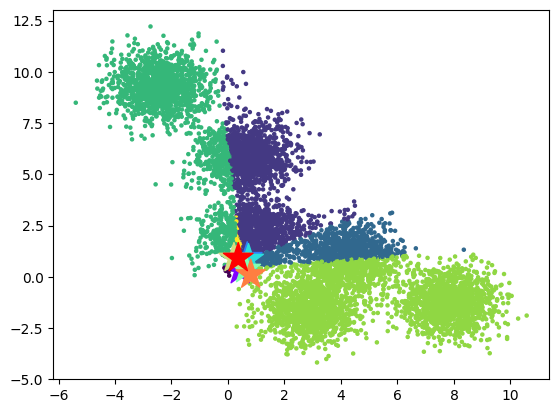

In [62]:
# TODO: Define the 'visualize_clustering' function with the following signature:
"""
Visualizes the clustering results.

Args:
    data: A 2D numpy array of shape (n, 2) representing the data points.
    cluster: A 1D numpy array of length n representing the cluster assignment for each data point.
    centroids: A 2D numpy array of shape (k, 2) representing the centroids.
"""

# TODO: Visulize current clustering using the 'visualize_clustering' function
from matplotlib import cm
def visualize_clustering(data, cluster, centroids):
    colors = cm.rainbow(np.linspace(0, 1, centroids.shape[0]))
    plt.scatter(data[:, 0], data[:, 1], c=cluster, s=5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=500, marker="*", c =colors)
# TODO: Report current objective using the 'calculate_objective' function
    calculate_objective(cluster=cluster, centroids=centroids, data=data)
visualize_clustering(data, assign_data_to_groups(data, initialize_centroids(7, 2)), initialize_centroids(7,2))



In [63]:
# TODO: Define the 'reassign_centroids' function with the following signature:
"""
Reassigns the centroids based on the current cluster assignments.

Args:
    data: A 2D numpy array of shape (n, p) representing the data points.
    cluster: A 1D numpy array of length n representing the cluster assignment for each data point.

Returns:
    A 2D numpy array of shape (k, p) representing the new centroids.
"""

# TODO: Update 'centroids' using the 'reassign_centroids' function
def reassign_centroids(data, cluster):
    new_centroids = []
    for i in np.unique(cluster):
        points = data[cluster == i]
        # mean = np.sum(points, axis=0) / len(points)
        mean = np.mean(points, axis=0)
        new_centroids.append(mean)
    return np.array(new_centroids)
reassign_centroids(data, assign_data_to_groups(data, centroids=initialize_centroids(7, 2)))

array([[ 0.16716892,  0.34698129],
       [ 1.09484305,  4.33805789],
       [ 3.80581483,  1.39727396],
       [ 0.73296767,  0.4621987 ],
       [-1.72821179,  7.58229275],
       [ 5.15887678, -1.10140194],
       [ 0.36892827,  1.64540669]])

<div dir="rtl" style="text-align: right; line-height: 2;">

حال با استفاده از توابعی که قبلا پیاده‌سازی کرده‌اید، گروه‌بندی فعلی را با مرکزهای جدید مجددا مجسم‌سازی کتید و تابع هدف را دوباره محاسبه کرده و گزارش دهید.

#### بحث کنید
- آیا با توجه به مراکز جدید، گروه‌بندی‌ها در حالت بهینه‌ای قرار دارند؟
</div>

In [64]:
# TODO: Visualize the new clusterin


<div dir="rtl" style="text-align: right; line-height: 2;">

حال این فرایند گروه‌بندی بر اساس مرکزها و سپس بهبود مرکزها را تکرار کتید و پس از هر تکرار مجددا مجسم‌سازی و گزارش تابع هدف را انجام دهید. می توانید کد آن را صرفا در یک cell بنویسید و آن cell را چندین بار اجرا کنید.

#### بحث کنید
- آیا تضمین می‌شود که همیشه به جایی برسیم که دیگر هر کاری کنیم بهبودی رخ ندهد و این الگوریتم به پایان برسد؟
</div>

np.float64(51617.02882215574)

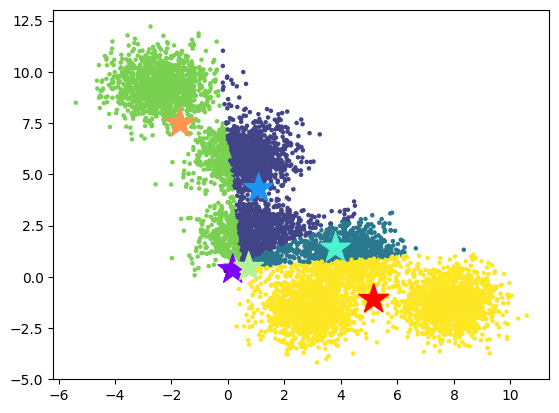

In [65]:
# TODO: Reassign data to clusters based on new centroids using 'assign_data_to_groups'
n_cluster = assign_data_to_groups(data, initialize_centroids(6, 2))
# TODO: Update 'centroids' using the 'reassign_centroids' function
n_centroids = reassign_centroids(data, n_cluster)
# TODO: Visulize current clustering using the 'visualize_clustering' function
visualize_clustering(data, n_cluster, n_centroids)
# TODO: Report current objective using the 'calculate_objective' function
calculate_objective(n_cluster, n_centroids, data)

<div dir="rtl" style="text-align: right; line-height: 2;">

## جمع‌بندی الگوریتم K-means

فرآیندی که طی شد الگوریتم K-means را تشکیل می‌دهد. این الگوریتم به این صورت است که ورودی آن تعدادی داده است و تعداد خوشه‌هایی است که می‌خواهیم داده را به آن تعداد خوشه تقسیم کنیم. در ابتدا به ازای هر خوشه یک شبه‌مرکز تولید می‌کنیم، سپس در هر مرحله ابتدا داده‌ها را بر اساس شبه‌مرکزها در آن لحظه خوشه‌بندی می‌کنیم و سپس شبه‌مرکزها را بر اساس گروه‌بندی جدید، به‌روزرسانی می‌کنیم تا زمانی که به جایی برسیم که دیگر بهبودی رخ نمی‌دهد.

چند مسئله در مورد این الگوریتم جای بحث دارد. برای مثال:
- آیا حتما این الگوریتم به پایان می‌رسد؟
- آیا انتخاب اولیه شبه‌مرکزها مهم است و در نتیجه نهایی تاثیر می‌گذارد؟
- آیا این الگوریتم تابع هدف را کمینه می‌کند؟ پاسخ دادن به پرسش قبل شاید در پاسخ به این پرسش کمک کند.

حال تابعی به نام `kmeans_cluster` بنویسید که با ورودی گرفتن `data` و `k` (تعداد خوشه‌ها) با استفاده از توابعی که تاکنون پیاده شده اند، این کار را انجام دهد و در خروجی به ترتیب لیست `cluster`، و پس از آن لیست `cluster_list` که لیستی از لیست `cluster` پس از هر مرحله است و لیست `centroids_list` که لیست شبه‌مرکزها پس از هر مرحله است را خروجی دهد.
</div>

In [67]:
# TODO: Define the 'kmeans_cluster' function with the following signature:
"""
Performs K-means clustering on the given data.

Args:
    data: A 2D numpy array of shape (n, p) representing the data points.
    k: The number of clusters.

Returns:
    A tuple containing:
        - cluster: A 1D numpy array of length n representing the final cluster assignment for each data point.
        - cluster_list: A list of cluster assignments after each iteration.
        - centroids_list: A list of centroids after each iteration.
"""
def kmeans_cluster(data, k):
    cluster_list = []
    centroids_list = []
    init_centroids = initialize_centroids(k, data.shape[1])
    centroids_list.append(init_centroids)
    new_cluster = assign_data_to_groups(data, init_centroids)
    cluster_list.append(new_cluster)
    for i in range(20):
        new_centroids = reassign_centroids(data, new_cluster)
        centroids_list.append(new_centroids)
        new_cluster = assign_data_to_groups(data, new_centroids)
        cluster_list.append(new_cluster)
    
    return new_cluster, cluster_list, centroids_list
kmeans_cluster(data, 5)[2][-1]

array([[ 2.95891515, -1.56210682],
       [ 0.54854494,  4.8485571 ],
       [ 3.10774309,  1.24729583],
       [ 7.75732031, -1.21532168],
       [-2.34275939,  9.25860437]])

<div dir="rtl" style="text-align: right; line-height: 2;">

## ارزیابی فرایند الگوریتم K-means

تابعی به نام `plot_objective_function` بنویسید که `cluster_list` و `centroids_list` را به عنوان ورودی بگیرد و مقادیر تابع هدف را پس از اجرای هر مرحله با استفاده از توابعی که پیش‌تر پیاده‌سازی شده‌اند مجاسبه کرده و در نهایت نمودار تابع هدف نسبت به مرحله را نمایش دهد.

سپس تابع `kmeans_cluster` را برای `data` اجرا کنید و نمودار تابع هدف را نمایش دهید.
</div>

10803.319406951608


np.float64(10803.319406951608)

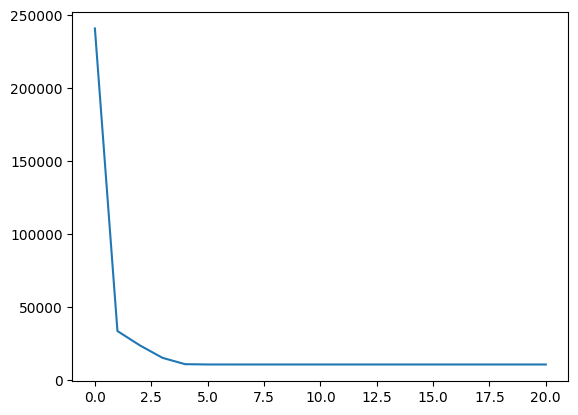

In [68]:
# TODO: Define the 'plot_objective_function' function with the following signature:
"""
Plots the objective function value over iterations.

Args:
    cluster_list: A list of cluster assignments after each iteration.
    centroids_list: A list of centroids after each iteration.
    data: The original data points.
"""

# plot the objective function value over iterations on dataset1
def plot_objective_function(cluster_list, centroids_list, data):
    cost_values = []
    for i in range(21):
        cluster_i = cluster_list[i]
        centroid_i = centroids_list[i]
        cost_values.append(calculate_objective(cluster_i, centroid_i, data))
    plt.plot(range(21), cost_values)
    print(cost_values[-1])
list_kmeans = kmeans_cluster(data, 6)
plot_objective_function(list_kmeans[1], list_kmeans[2], data)
calculate_objective(list_kmeans[0], list_kmeans[2][-1], data)
# plt.figure(figsize=(7, 7))
# visualize_clustering(data, list_kmeans[1][-1], list_kmeans[2][-1])

<div dir="rtl" style="text-align: right; line-height: 2;">

## اختیاری: مجسم‌سازی فرایند الگوریتم K-means

تابعی به نام `visualize_clustering_algorithm` بنویسید که `cluster_list` و `centroids_list` را ورودی بگیرد و یک gif از مجسم‌سازی خوشه‌بندی‌ها در پایان هر مرحله نمایش دهد.

سپس تابع `kmeans_cluster` را برای `data` اجرا کنید و فرایند آن را نمایش دهید.
</div>

In [ ]:
# TODO: Define the 'visualize_clustering_algorithm' function with the following signature:
"""
Visualizes the K-means clustering algorithm as a GIF.

Args:
    cluster_list: A list of cluster assignments after each iteration.
    centroids_list: A list of centroids after each iteration.
    data: The data points.
"""

# TODO: Visualize the K-means clustering algorithm on dataset1 as a GIF.
import imageio

<div dir="rtl" style="text-align: right; line-height: 2;">

## انتخاب تعداد خوشه‌ها

یکی از مسائل مهم در خیلی از روش‌های خوشه‌بندی مشخص کردن تعداد خوشه‌ها است. در مثالی که حل شد به صورت چشمی توانستیم تشخیص دهیم که اگر داده‌ها را به ۶ خوشه تقسیم‌کنیم گروه‌بندی منطقی‌تری انجام داده‌ایم اما همواره داده‌ها به این تمیزی نیستند، داده‌ها لزوما ابعاد کمی ندارند که بتوان به سادگی آن‌ها را مجسم کرد و با چشم تعداد خوشه‌ها را تشخیص داد، و همچنین گاهی فرایند استخراج داده و سپس خوشه‌بندی آن قرار است به صورت کاملا خودکار انجام شود و نمی‌توان پس از استخراج داده یک نفر را قرار داد که به صورت چشمی تعداد خوشه‌ها را تشخیص دهد.

#### بحث کنید
- یکی از پیچیدگی‌های این مسئله این است که تعریف کنیم منظورمان از k خوب چیست. مثلا اگر منظورمان از تعداد خوشه‌های مناسب این باشد که تابع هدف را کمینه کنیم، تعداد خوشه‌های مناسب چگونه به دست خواهد آمد؟ آیا این تعریف تعریف خوب و کارآمدی است؟ چه تعریف‌های دیگری به ذهنتان می‌رسد؟

راه حل واحدی برای این مسئله وجود ندارد. شما می‌توانید با بعضی از روش‌هایی که سعی در ارائه راه حلی برای این مسئله دارند در [اینحا](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) آشنا شوید.

به ازای تعداد خوشه‌های مختلف، از ۱ تا ۱۲، بر روی همین داده‌های کنونی الگوریتم را اجرا کنید و نمودار تابع هدف در انتهای اجرای الگوریتم بر اساس تعداد خوشه‌ها را رسم کنید. خروجی را بررسی کنید.
</div>

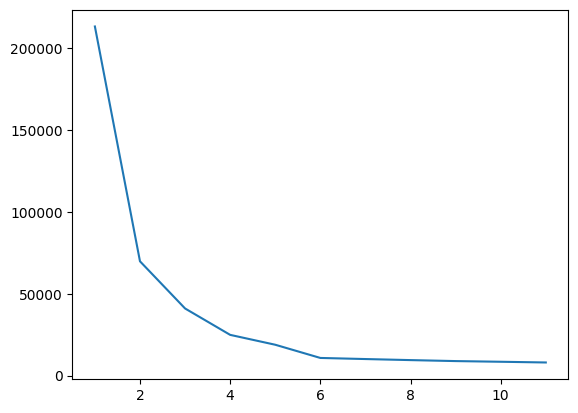

In [69]:
# TODO: Apply KMeans algorithm for different number of clusters and plot 'objective function' vs. 'number of clusters'
costs = []

for i in range(1, 12):
    list_kmeans = kmeans_cluster(data, i)
    costs.append(calculate_objective(list_kmeans[1][-1], list_kmeans[2][-1], data))
plt.plot(range(1, 12), costs);

<div dir="rtl" style="text-align: right;">

حال فایل `dataset2.txt` که فرمتی مشابه فایل `dataset1.txt` دارد را مثل همان فایل بارگذاری کرده و نقاط آن را نمایش دهید.

### بحث کنید
- به نظر شما در یک خوشه‌بندی خوب برای این مجموعه داده چند خوشه خواهیم داشت؟ خوشه‌ها به چه صورتی خواهند بود؟
- الگوریتم K-means چه عملکردی در قبال این مجموعه داده خواهد داشت؟ پیش‌بینی می‌کنید خروجی آن به چه شکلی باشد؟

</div>


[[ 0.59557929 -7.24834929]
 [ 8.02880875 -2.07252582]
 [ 5.43010973  7.34620631]
 [ 2.25552967 -7.13651253]
 [ 8.97774472 -2.0969444 ]
 [-3.63194003 -5.44106379]
 [ 2.71259202  6.74427031]
 [-0.88490298 -5.11090281]
 [-2.54003099 -9.10568376]
 [-5.34561151 -2.37475489]]


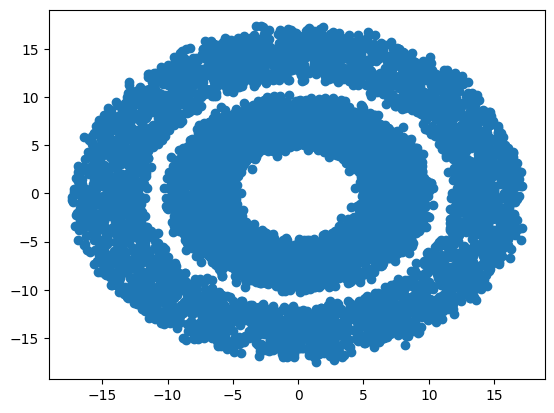

In [72]:
# TODO: Load dataset2.txt
data2 = np.loadtxt(r"E:\دوره تابستانه\Practice\clustering\dataset2.txt", delimiter=",")
# TODO: Print the first few lines of the dataset
print(data2[:10])
# TODO: Visualize dataset2.txt
plt.scatter(data2[:, 0], data2[:, 1])

<div dir="rtl" style="text-align: right;">

حال با استفاده از  الگوریتم K-means که پیاده‌سازی کردید این مجموعه داده را با تعداد خوشه‌ای که به نظرتان بهتر است خوشه‌بندی کنید و نتیجه را با استفاده از توابعی که پیاده‌سازی کرده‌اید بررسی کنید. به نظر شما آیا این یک خوشه‌بندی کارآمد است؟ در مورد اینکه آیا این خوشه‌بندی می‌تواند کاربرد خاصی داشته باشد یا خیر بحث کنید. به نظر شما آیا ممکن است با انتخاب شبه‌مرکزهای خاص به شکل دیگری از خوشه‌بندی برای این مجموعه داده رسید؟

#### بحث کنید
- آیا الگوریتم K-means برای همه مجموعه داده‌ها (با فرض ثابت‌بودن تعداد خوشه‌ها) جواب مناسبی می‌دهد؟ اگر پاسخ شما خیر است در مورد ویژگی‌های مجموعه داده‌هایی که الگوریتم K-means عملکرد مناسبی برای آن‌ها ندارد بحث کنید. آیا ممکن است الگوریتم دیگری با هدف کم‌کردن تابع هدف تعریف‌شده در این دفترچه وجود داشته باشد که بتواند برای این مجموعه‌ها عملکرد مناسبی داشته باشد؟

</div>


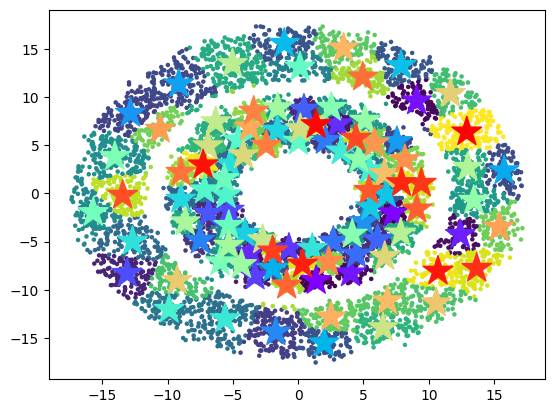

In [74]:
# Perform KMeans on dataset2 and visualize the result and objective function
list_kmeans = kmeans_cluster(data2, 100)
visualize_clustering(data2, list_kmeans[1][-1], list_kmeans[2][-1])

<div dir="rtl" style="text-align: right;">

داده‌هایی که تا کنون بررسی کردیم هر یک دو مولفه داشتند و به سادگی می‌توانستیم آن‌ها را مجسم کنیم و تعداد خوشه‌های مناسسب را به صورت چشمی تخمین بزنیم. حال مجموعه داده `dataset3.txt` را بارگذاری کنید و چند سطر اول آن و ابعاد آن را خروجی دهید.

</div>

In [76]:
# TODO: Load dataset3.txt
data3 = np.loadtxt("E:\دوره تابستانه\Practice\clustering\dataset3.txt", delimiter=",")
# TODO: Print the shape and first few lines of the dataset
print(data3.shape)
print(data3[:5])


(300, 4)
[[  0.74199584   5.03390888  -8.93810894   9.29902118]
 [ -1.651538     8.8543476    4.62086263   0.97064032]
 [  2.12650134   4.09885843 -10.3422747    9.11752197]
 [ -6.40064737  -6.54644749  -7.80078781   6.81350652]
 [  3.07185295   3.62621634  -8.27091605   9.59579665]]


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\alien\AppData\Local\Temp\ipykernel_2888\1558469186.py:2: SyntaxWarning: invalid escape sequence '\P'
  data3 = np.loadtxt("E:\دوره تابستانه\Practice\clustering\dataset3.txt", delimiter=",")


<div dir="rtl" style="text-align: right;">

فرآیند K-means پیاده‌سازی شده را به ازای تعداد خوشه‌های مختلف از ۲ تا ۱۵ بر روی این داده‌ها انجام دهید و نمودار تابع هدف را بر حسب تعداد خوشه‌ها رسم کنید و سپس بگویید کدام تعداد به نظر شما بهتر است و چرا.

#### بحث کنید
- اگر نمودار شما نزولی نیست به نظر شما چرا این اتفاق رخ داده است؟

</div>

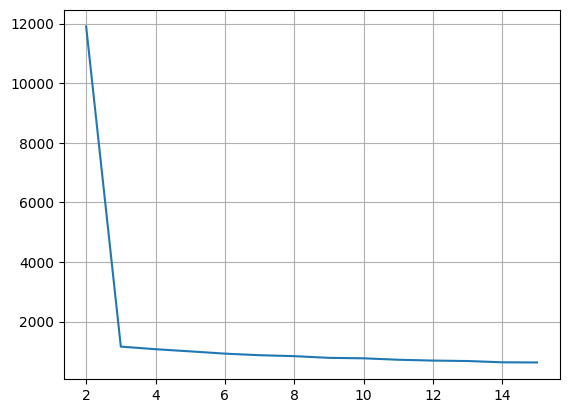

In [77]:
# Perform KMeans on dataset2 and visualize objective function
objectives = []
for k in range(2, 16):
    cluster, list_cluster, list_centroid = kmeans_cluster(data3, k)
    obj = calculate_objective(cluster, list_centroid[-1], data3)
    objectives.append(obj)


plt.plot(range(2, 16), objectives)
plt.grid(True)


<div dir="rtl" style="text-align: right;">

این مجموعه داده ۴ مولفه مختلف دارد. به ازای انتخاب هر ۳ تا از این ۴ مولفه، فقط همان ۳ مولفه را در نظر بگیرید و مجموعه داده را مجسم کنید.

</div>

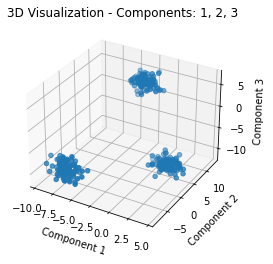

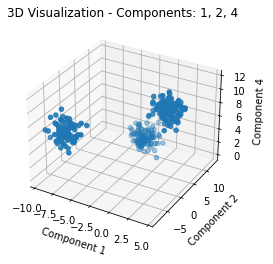

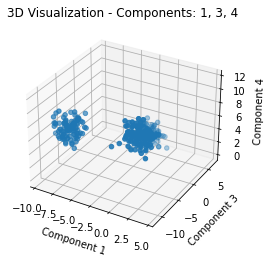

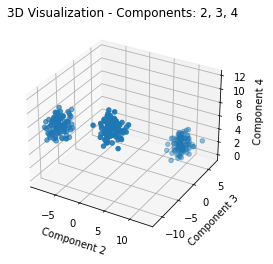

In [ ]:
# Visualize 3 co-ordinates of the dataset for each combination of 3 coordinates out of 4.


<div dir="rtl" style="text-align: right; line-height: 2;">

## اختیاری: فشرده‌سازی عکس‌ها با استفاده از الگوریتم K-means

تصاویر `image1.png`، `image2.png`، `image3.png`، `image4.png` را بارگذاری کرده و نمایش دهید.

</div>

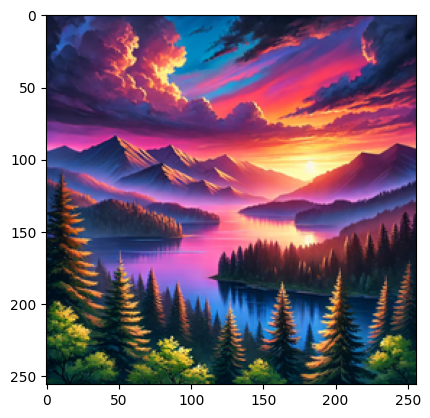

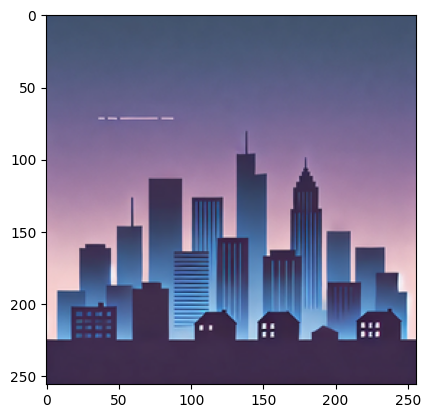

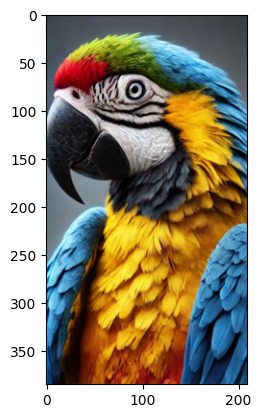

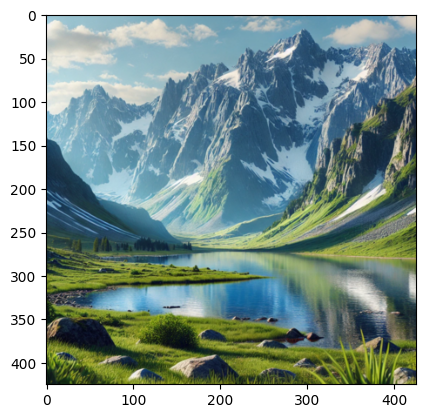

In [78]:
# TODO: Display the images.
import matplotlib.image as mpimg
image_files = [r"E:\دوره تابستانه\Practice\clustering\image1.png",
                r"E:\دوره تابستانه\Practice\clustering\image2.png",
                  r"E:\دوره تابستانه\Practice\clustering\image3.png",
                    r"E:\دوره تابستانه\Practice\clustering\image4.png"]
for i in image_files:
    img = mpimg.imread(i)
    plt.imshow(img)
    plt.show()



<div dir="rtl" style="text-align: right; line-height: 2;">

بحث کنید که چگونه می‌توان از این نوع از خوشه‌بندی برای فشرده‌سازی عکس‌ها استفاده کرد. سپس راه حل خود را پیاده‌سازی کنید تا مشخص شود خروجی آن روی این عکس‌ها به چه صورت خواهد بود و تاثیر کم و زیاد کردن تعداد خوشه‌ها روی خروجی عکس‌ها را بررسی کنید (مثلا تعداد خوشه‌ها را ۲ و ۴ و ۸ و ۱۶ قرار دهید و خروجی‌ها را با هم مقایسه کنید). بحث کنید این روش شما تا چه حد به فشرده‌سازی کمک می‌کند و آیا راه را برای فشرده‌سازی‌های از انواع دیگر باز میکند یا خیر.

(راهنمایی: عکس‌ها به ازای هر پیکسل در یک عکس معمولی فشرده‌سازی نشده، ۲۴ بیت داده ذخیره می‌شود - که البته با توجه به فرمت می‌تواند این تعداد فرق کند - یعنی به ازای هر یک از ۳ رنگ اصلی، ۸ بیت. تعداد این بیت‌ها را میخواهیم کاهش دهیم. می‌دانیم که حتما به عنوان هزینه این فشرده‌سازی افت کیفیت خواهیم داشت اما سعی می‌کنیم این افت کیفیت کمینه باشد.)
</div>

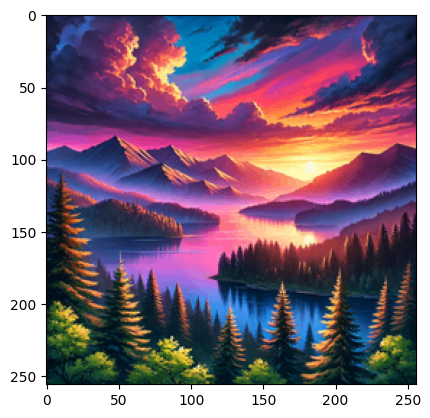

In [91]:
# TODO: Define the 'compress_image' function with the following signature:
"""
Compresses an image using K-means clustering.

Args:
    image_path: Path to the image file.
    k: The number of clusters (colors) to use.

Returns:
    The compressed image as a NumPy array.
"""


# Example usage
image_files = [r"E:\دوره تابستانه\Practice\clustering\image1.png",
                r"E:\دوره تابستانه\Practice\clustering\image2.png",
                  r"E:\دوره تابستانه\Practice\clustering\image3.png",
                    r"E:\دوره تابستانه\Practice\clustering\image4.png"]
k_values = [16]
def compress_image(image_path, k):

	image = mpimg.imread(image_path)
	pixels = image.reshape(-1, image.shape[-1])
	cluster, _, centroids_list = kmeans_cluster(pixels, k)
	centroid = centroids_list[-1]
	compressed_pixels = centroid[cluster]
	compress_image = compressed_pixels.reshape(image.shape)
	plt.imshow(compress_image)
compress_image(r"E:\دوره تابستانه\Practice\clustering\image1.png", 1024)
# TODO: Display the compressed images for each combination of image_file and k_value.

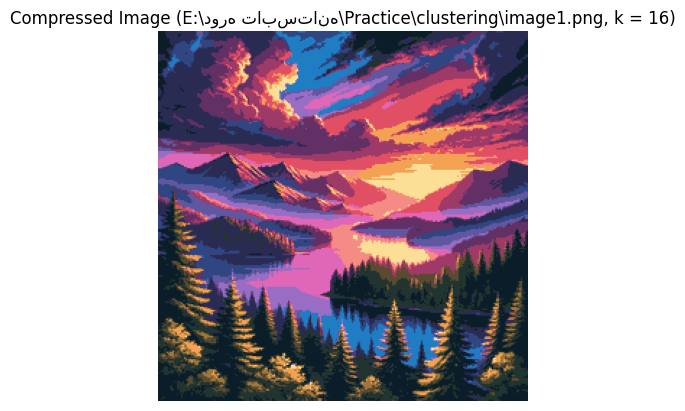

In [88]:

def compress_image(image_path, k):
    """
    Compresses an image using K-means clustering.

    Args:
        image_path: Path to the image file.
        k: The number of clusters (colors) to use.

    Returns:
        The compressed image as a NumPy array.
    """
    try:
        img = mpimg.imread(image_path)
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
        return None

    # Reshape the image into a 2D array of pixels, handling RGBA images
    pixels = img.reshape((-1, img.shape[-1])) # Reshape to handle RGBA
    # Perform K-means clustering
    cluster, _, centroids_list = kmeans_cluster(pixels, k)
    centroids = centroids_list[-1]  # Get the final centroids
    # Replace pixel values with the corresponding cluster centroids
    compressed_pixels = centroids[cluster]

    # Reshape the compressed pixels back to the original image dimensions
    compressed_img = compressed_pixels.reshape(img.shape)

    return compressed_img


# Example usage
image_files = [r"E:\دوره تابستانه\Practice\clustering\image1.png"]
k_values = [16] # Example k values

for image_file in image_files:
    for k in k_values:
        compressed_image = compress_image(image_file, k)
        if compressed_image is not None:
          plt.imshow(compressed_image)
          plt.title(f"Compressed Image ({image_file}, k = {k})")
          plt.axis('off')
          plt.show()

### بحث کنید
- چگونه می‌توان از خوشه‌بندی در ساخت سیستم‌های پیشنهاددهی استفاده کرد؟